In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/datasets/NHANES_age_prediction.csv')
data.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


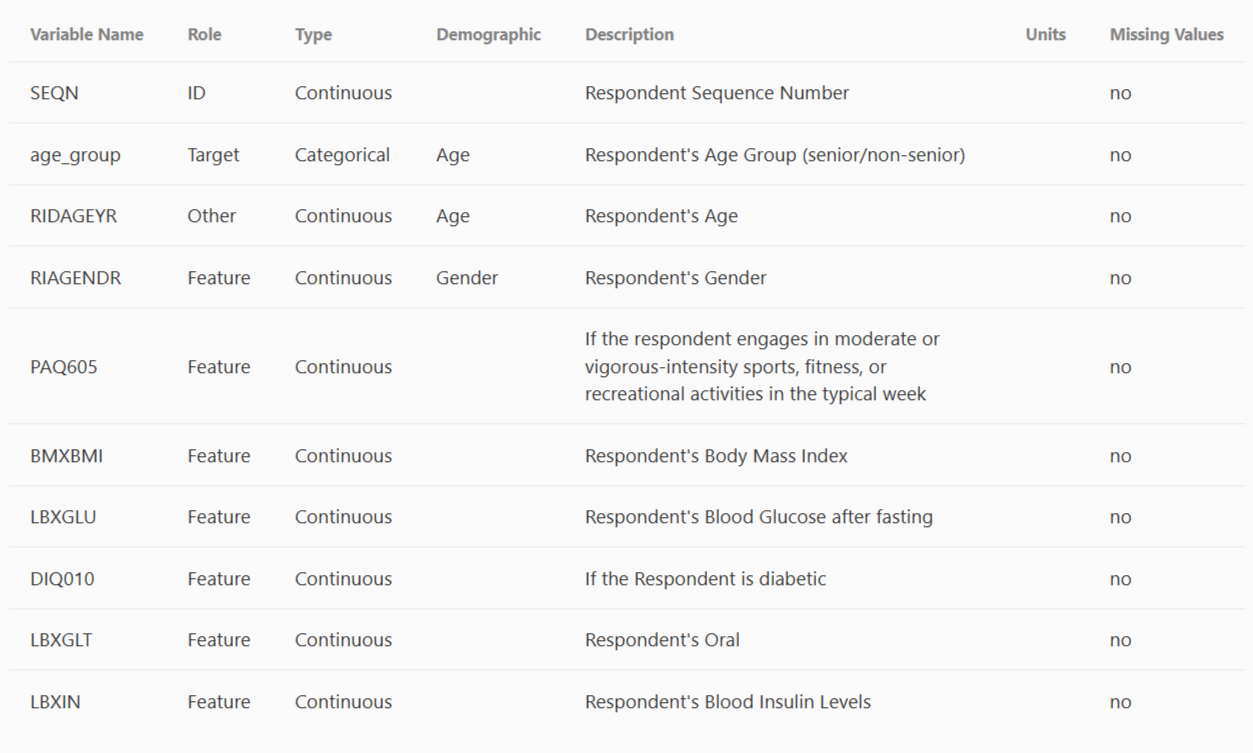

Вывести статистическую информацию о наборе данных

Вывести названия столбцов и строк

Заменить категориальные данные количественными

Визуализировать данные с помощью Matplotlib и Seaborn

Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!

Должно быть не менее 3х групповых визуализаций

In [5]:
data.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [6]:
data.describe(include=['O'])

,age_group
count,2278
unique,2
top,Adult
freq,1914


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [12]:
from sklearn.preprocessing import OneHotEncoder
data = data.copy()

# Кодирование age_group
print("\nКодирование age_group:")
print("-" * 40)
enc_age = OneHotEncoder()
res_age = enc_age.fit_transform(data[['age_group']])
print(f"Категории age_group: {enc_age.categories_[0]}")
age_array = res_age.toarray()
for i, category in enumerate(enc_age.categories_[0]):
    data[category] = age_array[:, i]

print("Первые 5 строк после кодирования age_group:")
print(data[['age_group'] + list(enc_age.categories_[0])].head())


Кодирование age_group:
----------------------------------------
Категории age_group: ['Adult' 'Senior']
Первые 5 строк после кодирования age_group:
  age_group  Adult  Senior
0     Adult    1.0     0.0
1     Adult    1.0     0.0
2     Adult    1.0     0.0
3     Adult    1.0     0.0
4     Adult    1.0     0.0


In [13]:
# Кодирование RIAGENDR (пол)
print("\nКодирование RIAGENDR (пол)")
print("-" * 40)
# RIAGENDR: 1 = Male, 2 = Female
data['gender_cat'] = data['RIAGENDR'].map({1: 'Male', 2: 'Female'})
enc_gender = OneHotEncoder()
res_gender = enc_gender.fit_transform(data[['gender_cat']])
print(f"Категории gender: {enc_gender.categories_[0]}")
gender_array = res_gender.toarray()
for i, category in enumerate(enc_gender.categories_[0]):
    data[category] = gender_array[:, i]

print("Первые 5 строк после кодирования гендера:")
print(data[['RIAGENDR', 'gender_cat'] + list(enc_gender.categories_[0])].head())


Кодирование RIAGENDR (пол)
----------------------------------------
Категории gender: ['Female' 'Male']
Первые 5 строк после кодирования гендера:
   RIAGENDR gender_cat  Female  Male
0       2.0     Female     1.0   0.0
1       2.0     Female     1.0   0.0
2       1.0       Male     0.0   1.0
3       1.0       Male     0.0   1.0
4       2.0     Female     1.0   0.0


In [14]:
# Кодирование PAQ605 (физическая активность)
print("\nКодирование PAQ605 (физическая активность):")
print("-" * 40)
activity_mapping = {1: 'Active', 2: 'Inactive', 7: 'Refused', 9: "Don't know"}
data['activity_cat'] = data['PAQ605'].map(activity_mapping)
active_data = data[data['activity_cat'].isin(['Active', 'Inactive'])].copy()

if len(active_data) > 0:
    enc_activity = OneHotEncoder()
    res_activity = enc_activity.fit_transform(active_data[['activity_cat']])

    print(f"Категории activity: {enc_activity.categories_[0]}")
    activity_array = res_activity.toarray()

    for i, category in enumerate(enc_activity.categories_[0]):
        data[f"activity_{category}"] = np.nan
        data.loc[active_data.index, f"activity_{category}"] = activity_array[:, i]

    print("Первые 5 строк после кодирования активности:")
    print(data[['PAQ605', 'activity_cat'] + [col for col in data.columns if 'activity_' in col]].head())


Кодирование PAQ605 (физическая активность):
----------------------------------------
Категории activity: ['Active' 'Inactive']
Первые 5 строк после кодирования активности:
   PAQ605 activity_cat activity_cat  activity_Active  activity_Inactive
0     2.0     Inactive     Inactive              0.0                1.0
1     2.0     Inactive     Inactive              0.0                1.0
2     2.0     Inactive     Inactive              0.0                1.0
3     2.0     Inactive     Inactive              0.0                1.0
4     1.0       Active       Active              1.0                0.0


In [15]:
# Кодирование DIQ010 (диабет)
print("\nКодирование DIQ010 (диабет):")
print("-" * 40)

diabetes_mapping = {1: 'Diabetic', 2: 'Non_Diabetic', 3: 'Borderline'}
data['diabetes_cat'] = data['DIQ010'].map(diabetes_mapping)
diabetes_data = data[data['diabetes_cat'].notna()].copy()

if len(diabetes_data) > 0:
    enc_diabetes = OneHotEncoder()
    res_diabetes = enc_diabetes.fit_transform(diabetes_data[['diabetes_cat']])

    print(f"Категории diabetes: {enc_diabetes.categories_[0]}")

    diabetes_array = res_diabetes.toarray()

    for i, category in enumerate(enc_diabetes.categories_[0]):
        data[f"diabetes_{category}"] = np.nan
        data.loc[diabetes_data.index, f"diabetes_{category}"] = diabetes_array[:, i]

    print("Первые 5 строк после кодирования диабета:")
    print(data[['DIQ010', 'diabetes_cat'] + [col for col in data.columns if 'diabetes_' in col]].head())


Кодирование DIQ010 (диабет):
----------------------------------------
Категории diabetes: ['Borderline' 'Diabetic' 'Non_Diabetic']
Первые 5 строк после кодирования диабета:
   DIQ010  diabetes_cat  diabetes_cat  diabetes_Borderline  diabetes_Diabetic  \
0     2.0  Non_Diabetic  Non_Diabetic                  0.0                0.0   
1     2.0  Non_Diabetic  Non_Diabetic                  0.0                0.0   
2     2.0  Non_Diabetic  Non_Diabetic                  0.0                0.0   
3     2.0  Non_Diabetic  Non_Diabetic                  0.0                0.0   
4     2.0  Non_Diabetic  Non_Diabetic                  0.0                0.0   

   diabetes_Non_Diabetic  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0  


In [16]:
data

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,...,gender_cat,Female,Male,activity_cat,activity_Active,activity_Inactive,diabetes_cat,diabetes_Borderline,diabetes_Diabetic,diabetes_Non_Diabetic
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,...,Female,1.0,0.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,...,Female,1.0,0.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,...,Male,0.0,1.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,...,Male,0.0,1.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,...,Female,1.0,0.0,Active,1.0,0.0,Non_Diabetic,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,...,Female,1.0,0.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,...,Male,0.0,1.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,...,Male,0.0,1.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,...,Female,1.0,0.0,Inactive,0.0,1.0,Non_Diabetic,0.0,0.0,1.0


In [17]:
print("\n" + "=" * 80)
print("УДАЛЕНИЕ ИСХОДНЫХ КАТЕГОРИАЛЬНЫХ СТОЛБЦОВ:")
print("=" * 80)

# Список столбцов для удаления
columns_to_drop = []
columns_to_drop.extend(['age_group', 'RIAGENDR', 'PAQ605', 'gender_cat', 'activity_cat', 'diabetes_cat'])

if columns_to_drop:
    print(f"Удаляем столбцы: {columns_to_drop}")
    data = data.drop(columns=columns_to_drop, errors='ignore')
    print(f"Удалено {len(columns_to_drop)} столбцов")
else:
    print("Нет столбцов для удаления")


УДАЛЕНИЕ ИСХОДНЫХ КАТЕГОРИАЛЬНЫХ СТОЛБЦОВ:
Удаляем столбцы: ['age_group', 'RIAGENDR', 'PAQ605', 'gender_cat', 'activity_cat', 'diabetes_cat']
Удалено 6 столбцов


In [ ]:
data

,SEQN,RIDAGEYR,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,Adult,Senior,Female,Male,activity_Active,activity_Inactive,diabetes_Borderline,diabetes_Diabetic,diabetes_Non_Diabetic
0,73564.0,61.0,35.7,110.0,2.0,150.0,14.91,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,73568.0,26.0,20.3,89.0,2.0,80.0,3.85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,73576.0,16.0,23.2,89.0,2.0,68.0,6.14,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,73577.0,32.0,28.9,104.0,2.0,84.0,16.15,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,73580.0,38.0,35.9,103.0,2.0,81.0,10.92,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,38.0,33.5,100.0,2.0,73.0,6.53,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2274,83712.0,61.0,30.0,93.0,2.0,208.0,13.02,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2275,83713.0,34.0,23.7,103.0,2.0,124.0,21.41,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2276,83718.0,60.0,27.4,90.0,2.0,108.0,4.99,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


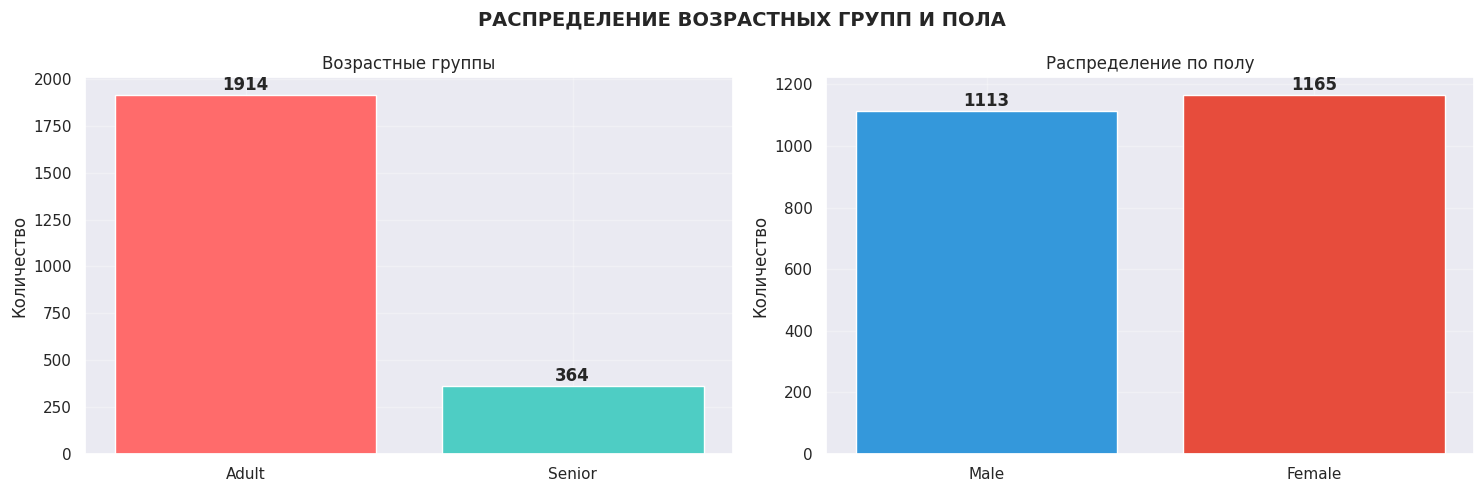

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('РАСПРЕДЕЛЕНИЕ ВОЗРАСТНЫХ ГРУПП И ПОЛА', fontsize=14, fontweight='bold')

# Распределение закодированных возрастных групп
if 'Adult' in data.columns and 'Senior' in data.columns:
    adult_count = data['Adult'].sum()
    senior_count = data['Senior'].sum()

    if not np.isnan(adult_count) and not np.isnan(senior_count):
        age_data = [adult_count, senior_count]
        labels_age = ['Adult', 'Senior']
        colors_age = ['#FF6B6B', '#4ECDC4']

        axes[0].bar(labels_age, age_data, color=colors_age)
        axes[0].set_title('Возрастные группы')
        axes[0].set_ylabel('Количество')

        for i, v in enumerate(age_data):
            axes[0].text(i, v + 5, f'{int(v)}', ha='center', va='bottom', fontweight='bold')

        axes[0].grid(True, alpha=0.3)

# Распределение закодированного пола
if 'Male' in data.columns and 'Female' in data.columns:
    male_count = data['Male'].sum()
    female_count = data['Female'].sum()

    if not np.isnan(male_count) and not np.isnan(female_count):
        gender_data = [male_count, female_count]
        labels_gender = ['Male', 'Female']
        colors_gender = ['#3498db', '#e74c3c']

        axes[1].bar(labels_gender, gender_data, color=colors_gender)
        axes[1].set_title('Распределение по полу')
        axes[1].set_ylabel('Количество')

        for i, v in enumerate(gender_data):
            axes[1].text(i, v + 5, f'{int(v)}', ha='center', va='bottom', fontweight='bold')

        axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

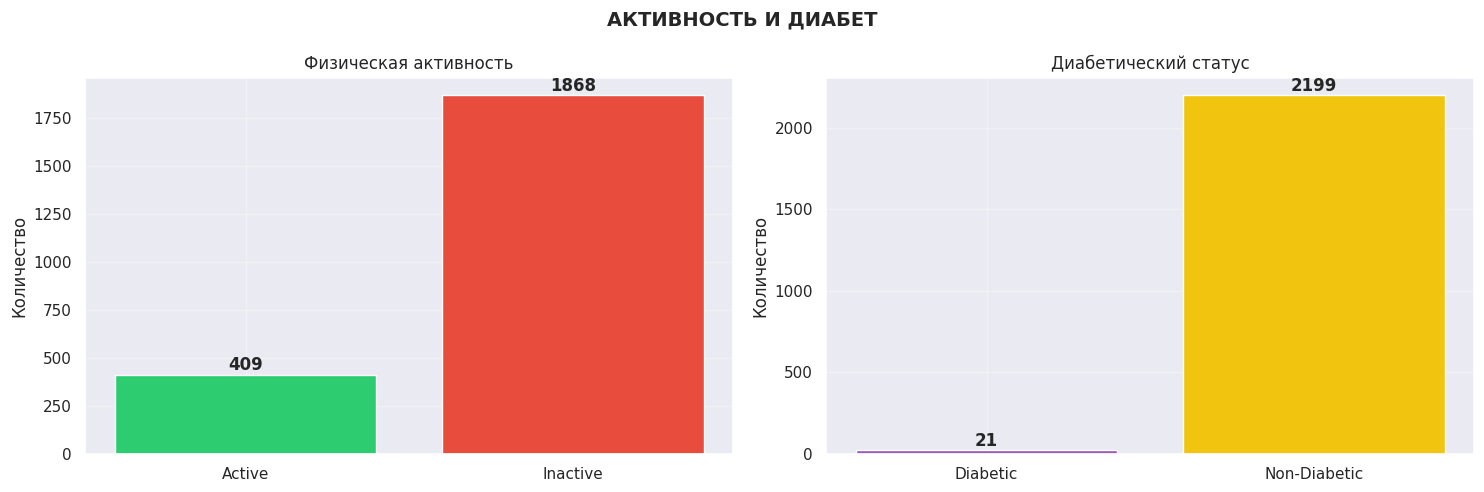

In [19]:
# Анализ активности и диабета
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('АКТИВНОСТЬ И ДИАБЕТ', fontsize=14, fontweight='bold')

# Распределение активности
if 'activity_Active' in data.columns and 'activity_Inactive' in data.columns:
    active_count = data['activity_Active'].sum()
    inactive_count = data['activity_Inactive'].sum()

    if not np.isnan(active_count) and not np.isnan(inactive_count):
        activity_data = [active_count, inactive_count]
        labels_activity = ['Active', 'Inactive']
        colors_activity = ['#2ecc71', '#e74c3c']

        axes[0].bar(labels_activity, activity_data, color=colors_activity)
        axes[0].set_title('Физическая активность')
        axes[0].set_ylabel('Количество')

        for i, v in enumerate(activity_data):
            axes[0].text(i, v + 5, f'{int(v)}', ha='center', va='bottom', fontweight='bold')

        axes[0].grid(True, alpha=0.3)

# Распределение диабета
if 'diabetes_Diabetic' in data.columns and 'diabetes_Non_Diabetic' in data.columns:
    diabetic_count = data['diabetes_Diabetic'].sum()
    non_diabetic_count = data['diabetes_Non_Diabetic'].sum()

    if not np.isnan(diabetic_count) and not np.isnan(non_diabetic_count):
        diabetes_data = [diabetic_count, non_diabetic_count]
        labels_diabetes = ['Diabetic', 'Non-Diabetic']
        colors_diabetes = ['#9b59b6', '#f1c40f']

        axes[1].bar(labels_diabetes, diabetes_data, color=colors_diabetes)
        axes[1].set_title('Диабетический статус')
        axes[1].set_ylabel('Количество')

        for i, v in enumerate(diabetes_data):
            axes[1].text(i, v + 5, f'{int(v)}', ha='center', va='bottom', fontweight='bold')

        axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2455394235.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(bmi_data, labels=labels, patch_artist=True)


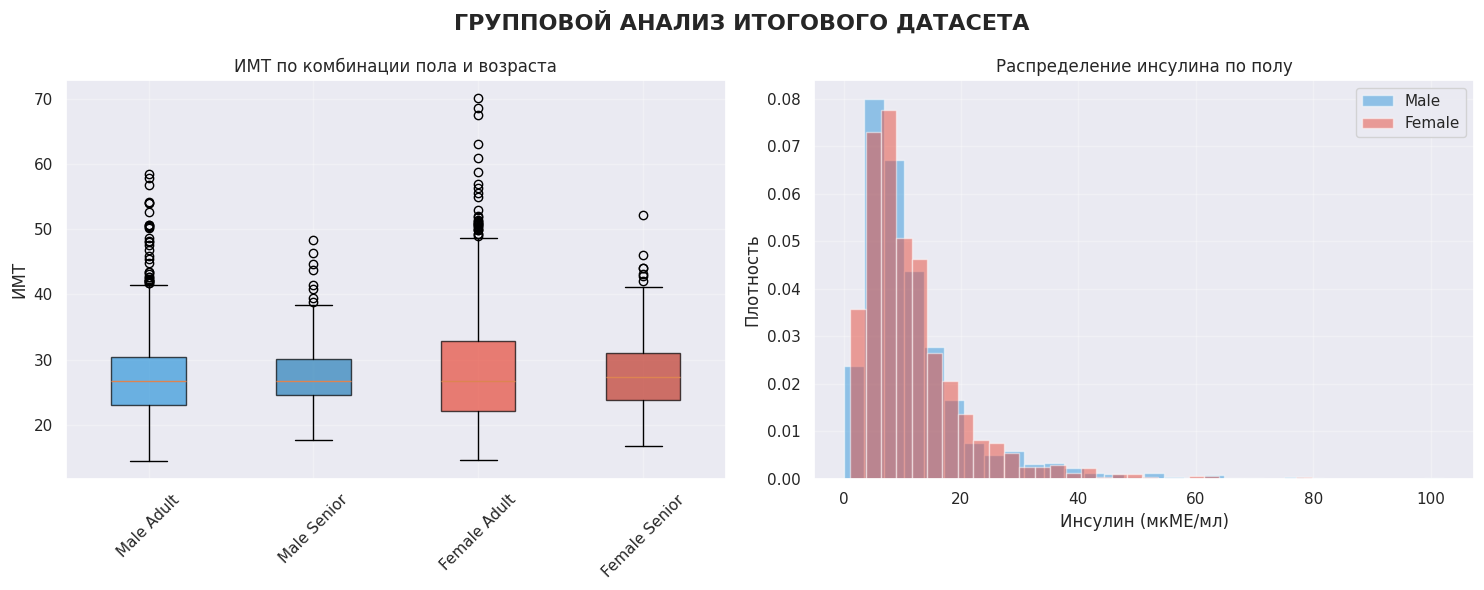

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ГРУППОВОЙ АНАЛИЗ ИТОГОВОГО ДАТАСЕТА', fontsize=16, fontweight='bold')

# Boxplot ИМТ по комбинации пола и возраста
ax1 = axes[0]
if all(col in data.columns for col in ['Adult', 'Senior', 'Male', 'Female']):
    # Создаем комбинированные группы
    bmi_data = []
    labels = []

    for age_col, gender_col, label in [
        ('Adult', 'Male', 'Male Adult'),
        ('Senior', 'Male', 'Male Senior'),
        ('Adult', 'Female', 'Female Adult'),
        ('Senior', 'Female', 'Female Senior')
    ]:
        mask = (data[age_col] == 1) & (data[gender_col] == 1)
        if mask.any():
            bmi_data.append(data.loc[mask, 'BMXBMI'].dropna())
            labels.append(label)

    if bmi_data:
        bp = ax1.boxplot(bmi_data, labels=labels, patch_artist=True)
        # Раскрашиваем boxplot
        colors = ['#3498db', '#2980b9', '#e74c3c', '#c0392b']
        for patch, color in zip(bp['boxes'], colors[:len(labels)]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax1.set_title('ИМТ по комбинации пола и возраста')
        ax1.set_ylabel('ИМТ')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'Нет данных для визуализации',
                ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('ИМТ по комбинации пола и возраста')
else:
    ax1.text(0.5, 0.5, 'Отсутствуют one-hot признаки для анализа',
            ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('ИМТ по комбинации пола и возраста')

# Распределение инсулина по полу
ax2 = axes[1]
if 'Male' in data.columns and 'Female' in data.columns:
    insulin_data_male = data[data['Male'] == 1]['LBXIN'].dropna()
    insulin_data_female = data[data['Female'] == 1]['LBXIN'].dropna()

    if len(insulin_data_male) > 0 and len(insulin_data_female) > 0:
        ax2.hist(insulin_data_male, bins=30, alpha=0.5, color='#3498db',
                label='Male', density=True)
        ax2.hist(insulin_data_female, bins=30, alpha=0.5, color='#e74c3c',
                label='Female', density=True)
        ax2.set_title('Распределение инсулина по полу')
        ax2.set_xlabel('Инсулин (мкМЕ/мл)')
        ax2.set_ylabel('Плотность')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'Недостаточно данных для визуализации',
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Распределение инсулина по полу')
else:
    ax2.text(0.5, 0.5, 'Отсутствуют one-hot признаки пола',
            ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Распределение инсулина по полу')

plt.tight_layout()
plt.show()

<Axes: >

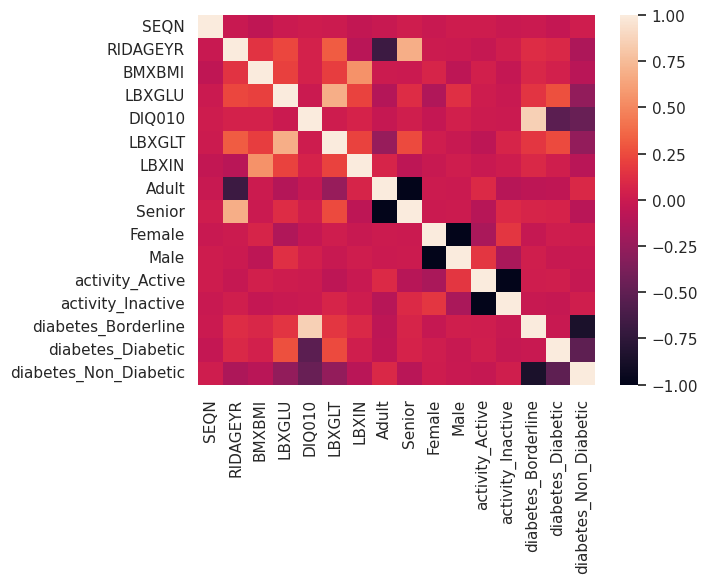

In [21]:
sns.heatmap(data.corr())

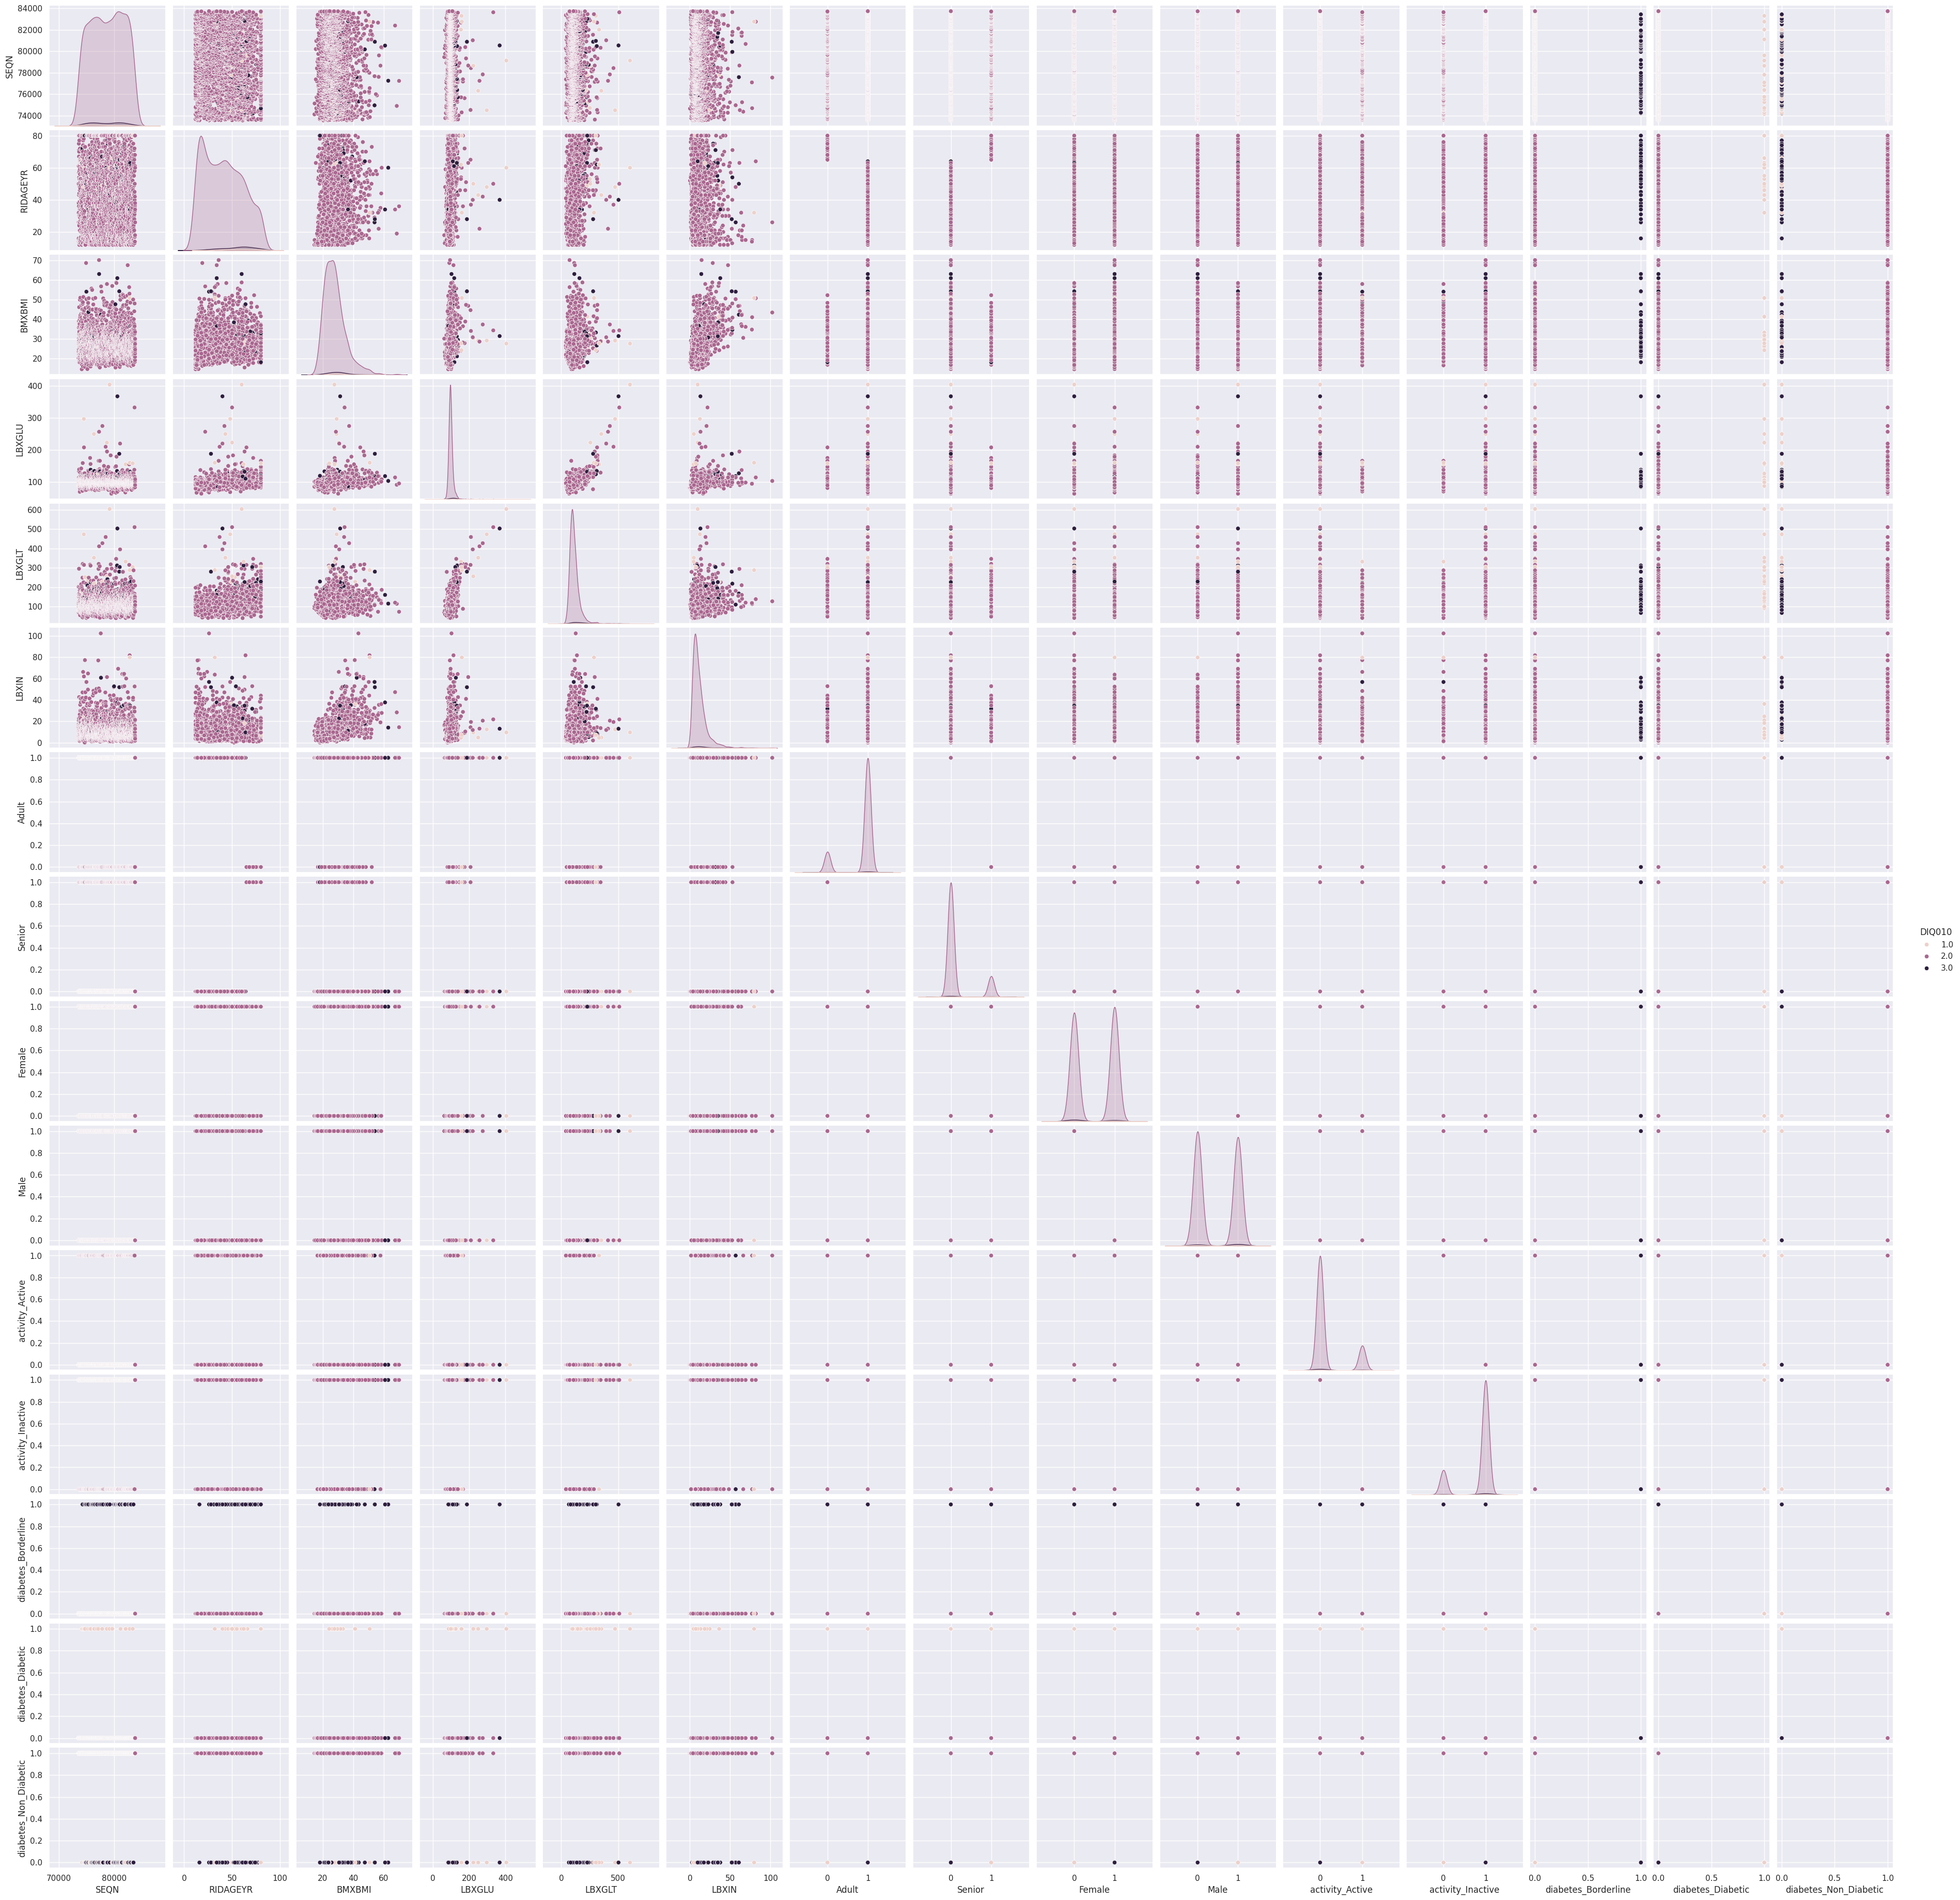

In [ ]:
sns.pairplot(data, kind="scatter", hue="DIQ010");